<div style="text-align: center;">
    <h1><b>Practical Work 4 : Second order ODEs and differential systems</b></h1>
</div>

*Authored in 2025 for educational purpose by S. Cardonna, Q. Richard, V. Lleras & P. Azerad. If you identify any issues or have suggestions for improvement, feel free to contact me.*  
  
**Introduction**  
We now are focused on implementing harmonic oscillator (one of the first example of differential equation in physics degree), and then a differential system from epidemiology called SIR (*Sound, Infected, Recovered*).


<div style="text-align: center;">
    <h2><b>Part 1 - Harmonic oscillator</b></h2>
</div>

The harmonic oscillator is described by the second-order differential equation:
$$
y'' = -y, \quad y(0) = 0, \quad y'(0) = 1.
$$
To solve this using numerically, it is rewritten as a first-order system:
$$
\begin{cases}
y_1' &= y_2, \\
y_2' &= -y_1, \\
y_2(0) &= 0
\end{cases}
$$

where $y_1 = y$ (position) and $y_2 = y'$ (velocity).

#### Proof that $y(t)^2+y'(t)^2 = C$ ####
To prove that $ y(t)^2 + y'(t)^2 $ is constant over time for the harmonic oscillator, we let $ E(t) := y(t)^2 + y'(t)^2 $. We then need to show that $ E(t) $ is constant, i.e., its derivative with respect to $ t $ is zero.
The derivative is, using the chain rule:
$$
\frac{dE}{dt} = \frac{d}{dt} \big( y(t)^2 \big) + \frac{d}{dt} \big( y'(t)^2 \big)
$$
$$
\Leftrightarrow \frac{dE}{dt} = 2y(t) \cdot y'(t) + 2y'(t) \cdot y''(t).
$$

Using the equation of motion $ y''(t) = -y(t) $, we then just substitute $ y''(t) $ into the derivative:
$$
\frac{dE}{dt} = 2y(t) \cdot y'(t) + 2y'(t) \cdot (-y(t)) =0 .
$$
We just proved that the quantity $ E(t) = y(t)^2 + y'(t)^2 $ is constant over time (this represents the conservation of energy for the harmonic oscillator).

#### Implementation of harmonic oscillator with RK45 ####

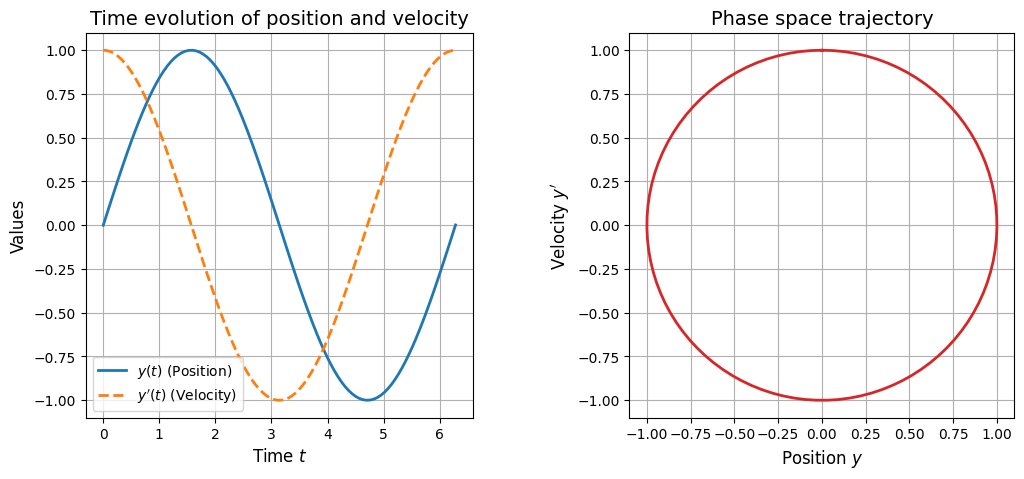

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definition of the differential system
# y[0] = y (position), y[1] = y' (velocity)
# y" = -y is written as y[0]' = y[1] and y[1]' = -y[0]

def harmonic_oscillator(t, y):
    return [y[1], -y[0]]

# Time interval (one period) and initial conditions
time_span = [0, 2 * np.pi]
initial_conditions = [0, 1]

# Solving the system over one period
time_points = np.linspace(0, 2 * np.pi, 100)
solution = solve_ivp(harmonic_oscillator, time_span, initial_conditions, t_eval=time_points, method='RK45')
t = solution.t
y = solution.y

# Plotting the results
plt.figure(figsize=(12, 5))

# Plot time evolution of y and y'
plt.subplot(1, 2, 1)
plt.plot(t, y[0], label='$y(t)$ (Position)', linewidth=2)
plt.plot(t, y[1], label="$y'(t)$ (Velocity)", linewidth=2, linestyle='--')
plt.xlabel('Time $t$', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title('Time evolution of position and velocity', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)

# Plot phase space trajectory
plt.subplot(1, 2, 2)
plt.plot(y[0], y[1], linewidth=2, color='tab:red')
plt.gca().set_aspect('equal', adjustable='box')  
plt.xlabel('Position $y$', fontsize=12)
plt.ylabel('Velocity $y\'$', fontsize=12)
plt.title('Phase space trajectory', fontsize=14)
plt.grid(True)
plt.subplots_adjust(wspace=0.4)
plt.show()

We indeed obtain a circle in the phase plane $(y, y')$. Indeed, since
$$
\frac{d}{dt} \big(y^2(t) + y'^2(t)\big) = 0,
$$
then
$$
y^2(t) + y'^2(t) = y^2(0) + y'^2(0) = 1.
$$
Here, of course, $y(t) = \sin t$ and $y'(t) = \cos t$.

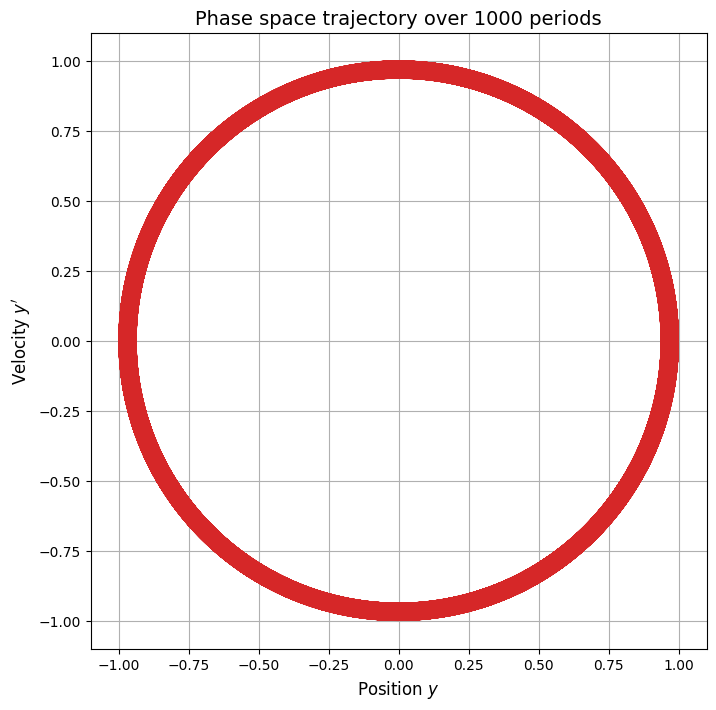

In [135]:
num_periods = 1000
time_span = [0, 2 * np.pi * num_periods]
initial_conditions = [0, 1]

# Solving the system over num_periods periods
time_points = np.linspace(0, 2 * np.pi * num_periods, 200000)
solution = solve_ivp(harmonic_oscillator, time_span, initial_conditions, t_eval=time_points, method='RK45')
y = solution.y

# Plotting the phase space trajectory
plt.figure(figsize=(12, 8))
plt.plot(y[0], y[1], linewidth=0.5, color='tab:red')
plt.gca().set_aspect('equal', adjustable='box')  
plt.xlabel('Position $y$', fontsize=12)
plt.ylabel('Velocity $y\'$', fontsize=12)
plt.title(f'Phase space trajectory over {num_periods} periods', fontsize=14)
plt.grid(True)
plt.show()

We observe that the circle thickens over time: the trajectories do not close perfectly because the discrete scheme does not preserve the first integral. It gradually loses energy, whereas the continuous differential system does not lose any.

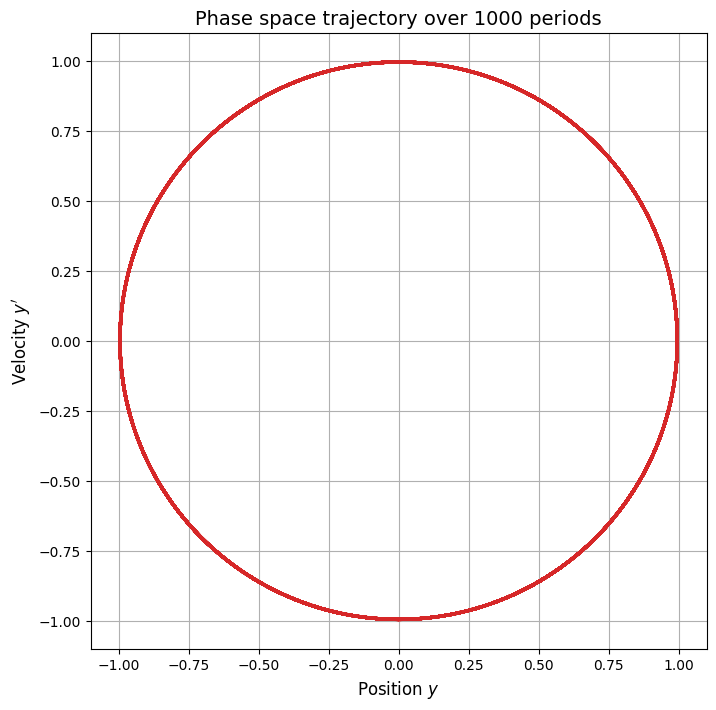

In [136]:
num_periods = 1000
time_span = [0, 2 * np.pi * num_periods]
initial_conditions = [0, 1]

time_points = np.linspace(0, 2 * np.pi * num_periods, 200000)
solution = solve_ivp(harmonic_oscillator, time_span, initial_conditions, t_eval=time_points, method='RK45', rtol=1e-5) # added precision
y = solution.y

# Plotting the phase space trajectory
plt.figure(figsize=(12, 8))
plt.plot(y[0], y[1], linewidth=0.5, color='tab:red')
plt.gca().set_aspect('equal', adjustable='box')  
plt.xlabel('Position $y$', fontsize=12)
plt.ylabel('Velocity $y\'$', fontsize=12)
plt.title(f'Phase space trajectory over {num_periods} periods', fontsize=14)
plt.grid(True)
plt.show()

With enhanced precision, this phenomenon is reduced. However, it is worth noting that if the number of periods is significantly increased (e.g., up to 10,000), the same issue reappears.

#### Implementation of harmonic oscillator with symplectic Euler scheme ####

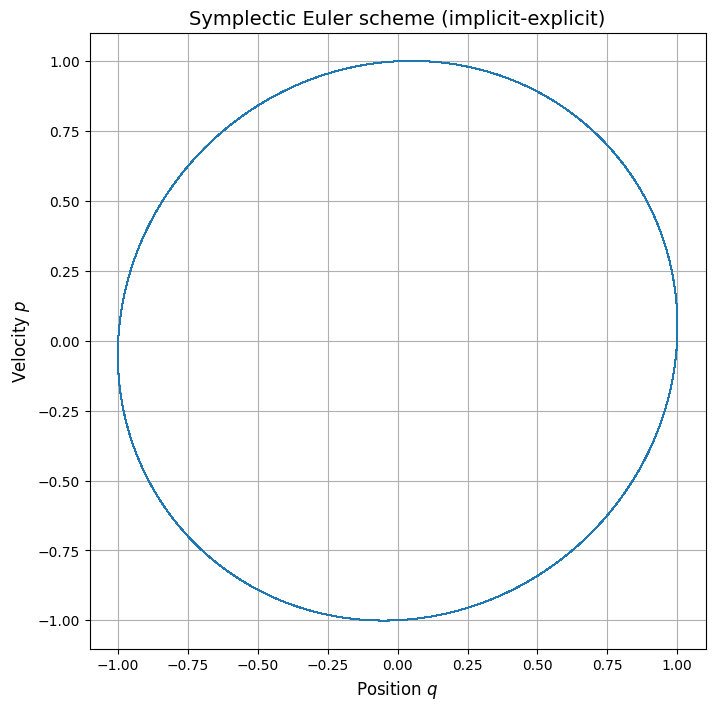

In [137]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation duration
num_periods = 10000
T = 2 * np.pi * num_periods
# Time step
h = 1e-1
# Number of points in the subdivision
N = int(T / h)

# Arrays to store position (q) and momentum (p)
q = np.zeros(N)
p = np.zeros(N)

# Initial conditions
q[0] = 0  # Initial position
p[0] = 1  # Initial momentum

# Symplectic Euler scheme
for k in range(N - 1):
    p[k + 1] = p[k] - h * q[k]
    q[k + 1] = q[k] + h * p[k + 1]

# Plotting the phase space trajectory
plt.figure(figsize=(12, 8))
plt.plot(q, p, '-', linewidth=0.5, color='tab:blue')
plt.axis('equal')
plt.gca().set_aspect('equal', adjustable='box')  
plt.xlabel('Position $q$', fontsize=12)
plt.ylabel('Velocity $p$', fontsize=12)
plt.title('Symplectic Euler scheme (implicit-explicit)', fontsize=14)
plt.grid(True)
plt.show()

The problem is resolved, even with a very coarse time step. The implicit-explicit scheme preserves energy, even when simulating over ten thousand periods. Interestingly, it is only a first-order scheme, like the standard Euler scheme. The order of a scheme ensures accuracy but does not guarantee the preservation of the system’s invariants. Schemes that preserve the natural invariants of the system are called *symplectic schemes*.

<div style="text-align: center;">
    <h2><b>Part 2 - SIR System</b></h2>
</div>

Let us now focus on implemnting the differential system from epidemiology called SIR (*Sound, Infected, Recovered*):
$$
\begin{cases} 
S'(t) &= -\beta \frac{S \cdot I}{N}, \\
I'(t) &= \beta \frac{S \cdot I}{N} - (\gamma + \delta) I, \\
R'(t) &= \gamma I, \\
D'(t) &= \delta I.
\end{cases}
$$

with the initial conditions:
$$
I(0) = 1, \quad R(0) = 0, \quad D(0) = 0, \quad S(0) = N - R(0) - I(0) - D(0).
$$

This classical epidemiological system models the spread of a virus within a population. The variable $N$ represents the initial population size. The parameters $\beta$, $\gamma$, and $\delta$ correspond to the rates of transmission, recovery, and mortality, respectively. 

#### Proof that $S(t) + I(t) + R(t) + D(t) = N$ ####
Let us define
$$
P(t) = S(t) + I(t) + R(t) + D(t),
$$
we then differentiate $ P(t) $ with respect to $ t $:
$$
P'(t) = S'(t) + I'(t) + R'(t) + D'(t).
$$
We replace the expressions for $ S'(t) $, $ I'(t) $, $ R'(t) $, and $ D'(t) $:
$$
P'(t) = \left(-\beta \frac{S \cdot I}{N}\right) + \left(\beta \frac{S \cdot I}{N} - (\gamma + \delta) I\right) + (\gamma I) + (\delta I)
$$
$$
= -\beta \frac{S \cdot I}{N} + \beta \frac{S \cdot I}{N} - (\gamma + \delta) I + \gamma I + \delta I = 0.
$$

Since $ P'(t) = 0 $, $ P(t) $ is constant over time. From the initial conditions, we know:
$$
P(0) = S(0) + I(0) + R(0) + D(0) = N.
$$
Thus, $ P(t) = N $ for all $ t $.

#### Implementation of SIR with RK45 ####

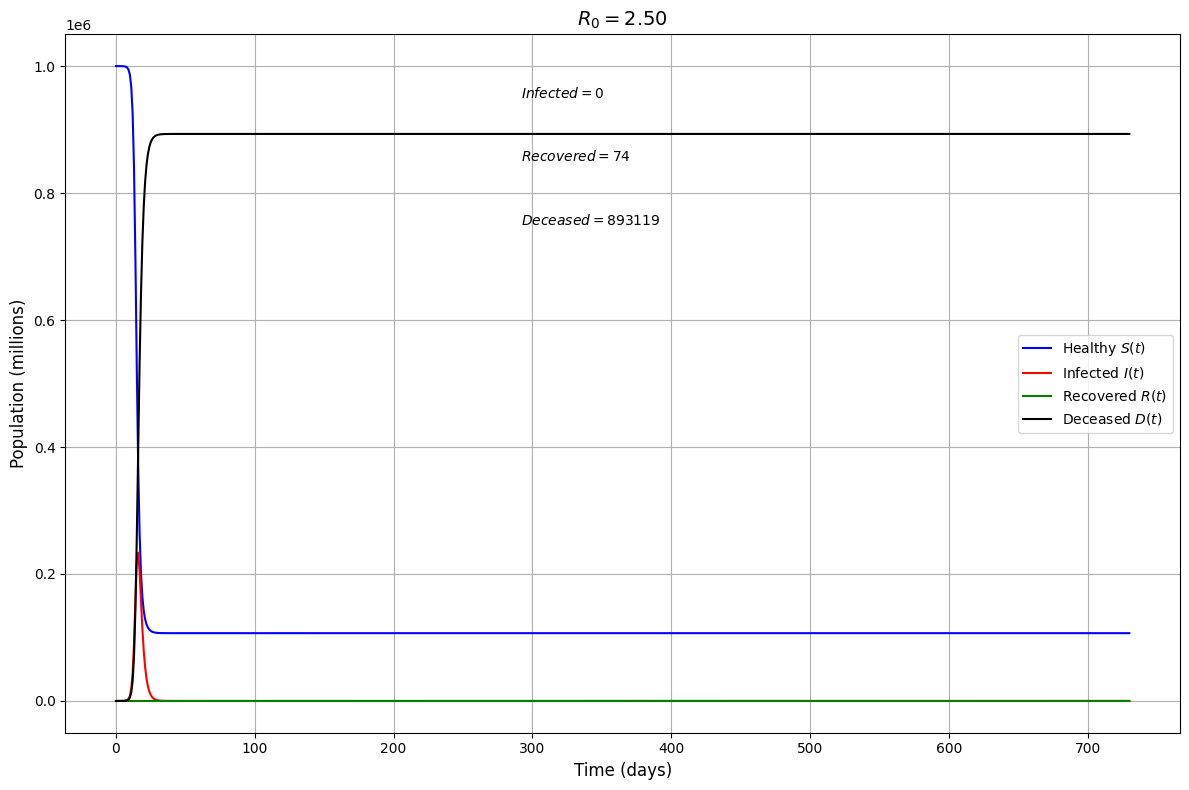

Peak number of infected individuals: 233555
Population conservation error: 6.984919309616089e-10


In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


def SIR(t, y, N, beta, gamma, delta):
    """
    Differential equations of the SIR model.

    Parameters:
    - N: Total population
    - beta: Infection rate
    - gamma: Recovery rate
    - delta: Mortality rate

    Variables:
    - S: Susceptible population
    - I: Infected population
    - R: Recovered population
    - D: Deceased population
    """
    S, I, R, D = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I - delta * I
    dRdt = gamma * I
    dDdt = delta * I
    return dSdt, dIdt, dRdt, dDdt


def SIR_scheme(N=1000000, duration=730, beta=1.5, gamma=0.00005, delta=0.5):
    """
    Simulates the SIRD model and plots the results.

    Parameters:
    - N: Total population (default: 1,000,000)
    - duration: Simulation duration in days (default: 730 days, i.e., 2 years)
    - beta: Infection rate (default: 0.2)
    - gamma: Recovery rate (default: 0.1)
    - delta: Mortality rate (default: 0.01)
    """

    # Initial conditions
    I0, R0, D0 = 1, 0, 0  # Initial infected, recovered, deceased
    S0 = N - I0 - R0 - D0  # Initial susceptible population
    y0 = S0, I0, R0, D0  # Initial state vector

    # Time vector for the simulation
    t = np.linspace(0, duration, duration)

    # Solve the differential equations
    solution = solve_ivp(SIR, [0, duration], y0, t_eval=t, args=(N, beta, gamma, delta))
    S, I, R, D = solution.y

    # Plot the results
    plt.figure(figsize=(12, 8))
    plt.plot(t, S, 'b', label=f'Healthy $S(t)$')
    plt.plot(t, I, 'r', label=f'Infected $I(t)$')
    plt.plot(t, R, 'g', label=f'Recovered $R(t)$')
    plt.plot(t, D, 'k', label=f'Deceased $D(t)$')
    plt.xlabel('Time (days)', fontsize=12)
    plt.ylabel('Population (millions)', fontsize=12)

    # Calculate R_0
    R_0 = beta * S0 / (N * (gamma + delta))
    plt.title(r'$R_0 = %.2f$' % R_0, fontsize=14)

    # Display final values for the populations
    plt.text(0.4 * duration, 0.95 * N, r'$Infected=%.1i$' % I[-1])
    plt.text(0.4 * duration, 0.85 * N, r'$Recovered=%.1i$' % R[-1])
    plt.text(0.4 * duration, 0.75 * N, r'$Deceased=%.1i$' % D[-1])

    plt.legend(fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('sir_plot.png')
    plt.show()

    print('Peak number of infected individuals:', int(np.max(I)))
    # Verify population conservation
    conservation_error = np.max(np.abs(N - (S + I + R + D)))
    print('Population conservation error:', conservation_error)

    return


SIR_scheme()

When the parameter $\delta$ is increased, we observe that the epidemic stops! Although the virus becomes much more virulent, infected individuals die too quickly, leaving insufficient time to infect others.